In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

In [47]:
data = pd.read_csv("../dataset/postings.csv")

In [48]:
data.dropna(subset=['company_name'], inplace=True)

In [49]:
top_companies = data['company_name'].value_counts().nlargest(8)
print(top_companies)

company_name
Liberty Healthcare and Rehabilitation Services    1108
The Job Network                                   1003
J. Galt                                            604
TEKsystems                                         529
Lowe's Companies, Inc.                             527
Ingersoll Rand                                     517
Capital One                                        496
Cogent Communications                              476
Name: count, dtype: int64


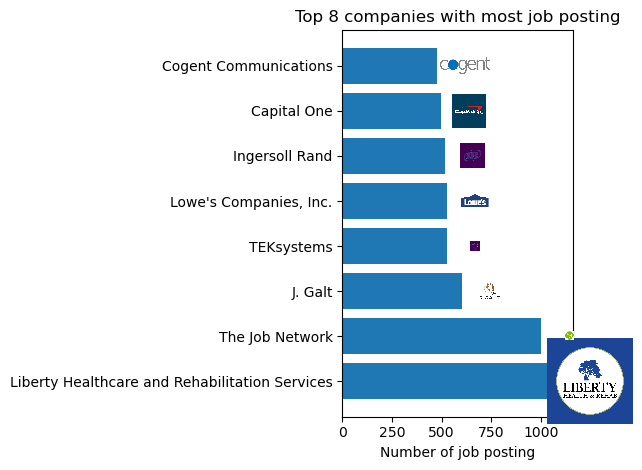

In [78]:
image = ['images/comp logo/Liberty Healthcare and Rehabilitation Services.jpg','images/comp logo/the job network.jpeg', 'images/comp logo/J. Galt.webp','images/comp logo/TEKsystems.png','images/comp logo/lowes-dp18-328966-og.png', 'images/comp logo/ingersoll-rand--600.png', 'images/comp logo/Capital One.jpg', 'images/comp logo/cogent_communications_logo.jpg']
fig, ax = plt.subplots()
bars = ax.barh(top_companies.index, top_companies.values)
def add_image_on_bar(bar, image):
    img = Image.open(image)
    imagebox = OffsetImage(img, zoom=0.03)  
    ab = AnnotationBbox(imagebox, (bar.get_width(), bar.get_y() + bar.get_height()/2), xybox=(20, 0),
                        xycoords='data', frameon=False,
                        boxcoords="offset points",
                        pad=0)
    ax.add_artist(ab)
for bar, image in zip(bars, image):
    add_image_on_bar(bar, image)
plt.title('Top 8 companies with most job posting')
plt.xlabel('Number of job posting')
plt.tight_layout()
plt.show()